# 0. Import Required Library

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization,MaxPooling2D, GlobalAveragePooling2D,Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score

Mounted at /content/drive


# 1. Read data

## Connect Goggle drive

In [ ]:
import os


os.chdir('/content/drive/MyDrive/Colab Notebooks/DACON/hand_gesture')

In [ ]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

## read data

데이터를 확인해 보아도 특별히 알 수 있는 정보가 없다.

In [ ]:
train_df

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,2331,-3.971043,39.913391,16.034626,-19.067697,8.061361,-70.916786,-39.937026,12.834223,-21.937973,...,3.086417,-4.954858,-11.106802,-37.863399,31.069292,-4.097017,-13.095192,-5.150284,8.016265,3
2331,2332,-3.011710,-4.060355,-1.046067,4.178137,-2.003243,-2.895017,-2.766757,-29.099123,-4.208953,...,6.871938,-0.134367,-0.867018,23.892336,-11.977934,1.984203,0.891666,28.822082,-0.878670,3
2332,2333,-9.001824,5.985711,-8.146347,-10.902201,5.102105,8.133692,32.877614,-3.017438,-3.174442,...,-7.952857,2.049467,-5.825790,-37.989569,15.014132,1.160272,-11.135889,-7.035763,-0.930067,3
2333,2334,-3.987992,3.011460,-11.949323,-3.810885,16.880234,-5.150117,9.182801,4.960190,-21.002525,...,3.080276,2.054739,-1.052350,-6.019488,-7.075333,-5.826058,-3.989168,14.916905,-12.093426,1


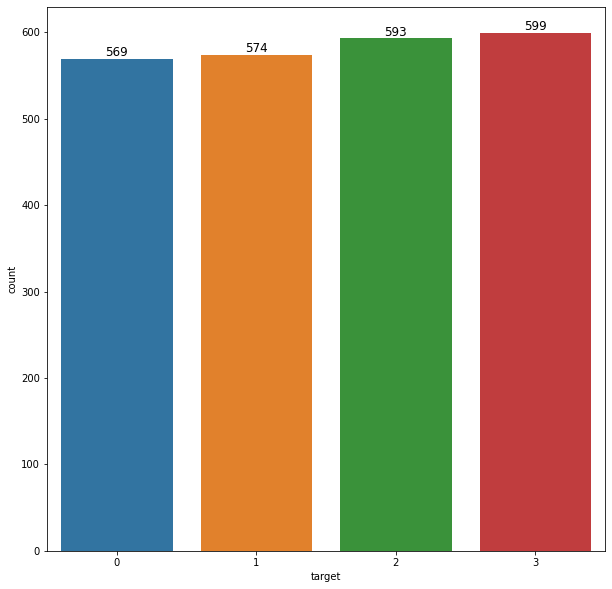

In [ ]:
# 목표 변수 분포 확인
plt.figure(figsize=(10,10))
ax = sns.countplot(x='target', data=train_df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, p.get_height(), ha = 'center', size = 12)

plt.show()

In [ ]:
test_df

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,1,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,2,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,3,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,4,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,5,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9338,9339,7.963652,7.973099,12.877346,11.015341,-0.963491,-3.926525,-30.875620,6.022538,-1.934085,...,-6.913374,-28.872380,-0.822110,3.043326,11.113028,11.160472,2.034703,-0.056564,-3.959809,22.986533
9339,9340,-7.974772,0.997146,8.011316,-10.007376,1.065419,-15.090632,1.916883,-2.981494,2.948488,...,0.972399,-4.158987,-4.971529,-9.957906,19.081232,-3.056299,-0.714567,-0.859710,7.950773,2.952029
9340,9341,4.035916,-10.138330,5.943174,8.080807,28.007780,4.981148,23.084630,-30.048268,9.877151,...,-11.013990,-26.176325,23.143486,4.913298,25.066640,4.044110,-1.948533,1.921691,13.952396,11.866490
9341,9342,8.920498,0.033165,20.058309,68.132886,4.037498,19.068331,-4.109146,-4.067740,-11.044263,...,-7.072355,-18.864597,2.902505,-13.936057,3.058599,33.004942,2.932643,9.968502,-3.097104,7.966220


## Scaling & Reshaping

In [ ]:
train_X = train_df.iloc[:, 1:-1]
test_X = test_df.iloc[:, 1:]

In [ ]:
from sklearn.preprocessing import RobustScaler


rs = RobustScaler()

In [ ]:
train_X = rs.fit_transform(train_X)
test_X = rs.transform(test_X)

In [ ]:
train_X = np.array(train_X).reshape(-1, 8, 4, 1)
test_X = np.array(test_X).reshape(-1, 8, 4, 1)

## Encoding labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse = False)

In [ ]:
train_y = ohe.fit_transform(train_df[['target']])

# 2. Create Folds

In [ ]:
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)

# 3. Create & Training Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


es = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', verbose = 0)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model


tf.random.set_seed(408)
cnn_acc = []
cnn_pred = np.zeros((test_X.shape[0], 4))
for i, (tr_idx, val_idx) in enumerate(skf.split(train_X, train_df.target)) :
    print(f'{i + 1} Fold Training.....')
    tr_x, tr_y = train_X[tr_idx], train_y[tr_idx]
    val_x, val_y = train_X[val_idx], train_y[val_idx]
    
    ### CNN 모델
    cnn = Sequential()
    cnn.add(Conv2D(8, (2, 2), padding = "same", activation = 'elu', input_shape = (8, 4, 1)))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(16, (3, 3), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(32, (5, 5), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(16, (3, 3), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(8, (2, 2), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(GlobalAveragePooling2D())
    cnn.add(Dense(16, activation = 'elu'))
    cnn.add(Dense(4, activation = 'softmax'))


    ### ModelCheckPoint Fold마다 갱신
    mc = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 0)
    
    ### 모델 compile
    cnn.compile(optimizer = RMSprop(learning_rate = 0.04), loss = 'categorical_crossentropy', metrics = ['acc'])

    cnn.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 1000, batch_size = 32, callbacks = [es, mc], verbose = 0)

    ### 최고 성능 기록 모델 Load
    best = load_model(f'model_{i + 1}.h5')
    ### validation predict
    val_pred = best.predict(val_x)
    ### 확률값 중 최대값을 클래스로 매칭
    val_cls = np.argmax(val_pred, axis = 1)
    ### Fold별 정확도 산출
    fold_cnn_acc = accuracy_score(np.argmax(val_y, axis = 1), val_cls)
    cnn_acc.append(fold_cnn_acc)
    print(f'{i + 1} Fold ACC of CNN = {fold_cnn_acc}\n')

    ### Fold별 test 데이터에 대한 예측값 생성 및 앙상블
    fold_pred = best.predict(test_X) / skf.n_splits
    cnn_pred += fold_pred

1 Fold Training.....
1 Fold ACC of CNN = 0.8632478632478633

2 Fold Training.....
2 Fold ACC of CNN = 0.8675213675213675

3 Fold Training.....
3 Fold ACC of CNN = 0.9188034188034188

4 Fold Training.....
4 Fold ACC of CNN = 0.8547008547008547

5 Fold Training.....
5 Fold ACC of CNN = 0.8461538461538461

6 Fold Training.....
6 Fold ACC of CNN = 0.8369098712446352

7 Fold Training.....
7 Fold ACC of CNN = 0.8669527896995708

8 Fold Training.....
8 Fold ACC of CNN = 0.8626609442060086

9 Fold Training.....
9 Fold ACC of CNN = 0.8755364806866953

10 Fold Training.....
10 Fold ACC of CNN = 0.9055793991416309



In [ ]:
sum(cnn_acc) / 10

0.8698066835405891

# 4. Make submission

In [ ]:
submission['target'] = np.argmax(cnn_pred, axis = 1)

In [ ]:
submission.target.value_counts()

2    2408
1    2371
3    2314
0    2250
Name: target, dtype: int64

In [ ]:
submission.to_csv('best_cnn.csv', index = False)